# Traditional Gradient Descent Algorithm

In [135]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Generate linear data with some noise

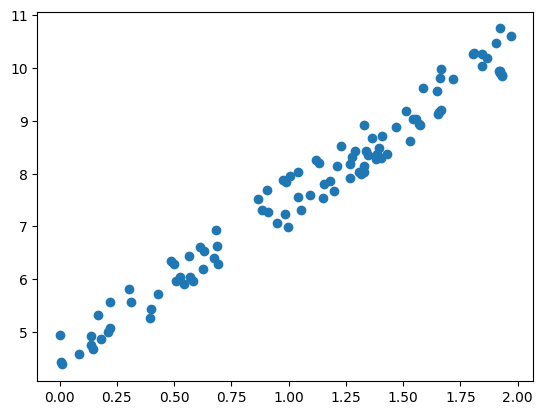

In [136]:
x = 2 * np.random.rand(100,1)
y = 4 +3 * x+np.random.rand(100,1)

plt.scatter(x,y)
plt.show()

### Straight line

Let's assume I have a straight line as `y=mx+c`.
Let the value of `m` and `c` be `0` and `0` initially.

### Cost Function
For a point `(X,Y)`, cost is calculated as: `cost = Y_pred - Y_orig`. Where `Y_pred = m * X + c`
#### Including all data points
Let `n = NoOfData`
`Cost = 1/(2 * n) * Summation_0_n((Y_pred - Y_orig)^2)`

### Derivative of this cost function
#### Derivative over m
`Derivative(Cost)_m = 1/n * Summation_0_n((Y_pred - Y_orig) * X)`
#### Derivative over c
`Derivative(Cost)_c = 1/n * Summation_0_n(Y_pred - Y_orig)`

### Updates on `m` and `c`
`M_new = M_old - alpha * Derivative(Cost)_m`\
`C_new = C_old - alpha * Derivative(Cost)_c`

### Step by step calculation of gradiently descended slope and intercept values

In [137]:
def f(m, c, x):
    return m*x+c

In [138]:
m = 0
c = 0
y_pred = [f(m,c,i) for i in x]
errors_only = []
errors_mul_x = []
for i in range(len(y)):
    diff = y_pred[i]-y[i]
    errors_only.append(diff)
    errors_mul_x.append(diff * x[i])
sum(errors_only)[0]

-771.5396005477043

In [139]:
d_c = 1/len(y) * sum(errors_only)[0]
d_m = 1/len(y) * sum(errors_mul_x)[0]
print(d_c, d_m)

-7.715396005477043 -9.263486761753231


In [140]:
alpha = 0.01
mnew = m - alpha * d_m
c = c - alpha * d_c
m = mnew
print(m,c)

0.09263486761753231 0.07715396005477043


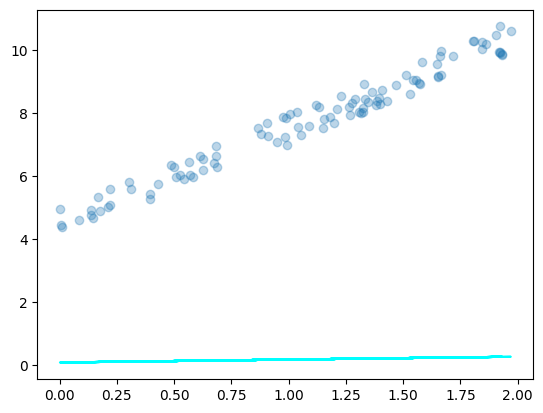

In [141]:
plt.scatter(x,y, alpha=0.3)
plt.plot(x, [(m*i+c) for i in x], 'aqua')
plt.show()

We can see it has gained positive slope. It means the function is being optimized.

### Now do it in loop until it hits saturation level

In [ ]:
m = 0
c = 0
alpha = 0.0001
total_error_history = []
while(len(total_error_history) < 2 or (total_error_history[-2]-total_error_history[-1] > 0.0000001)):
    y_pred = [f(m,c,i) for i in x]

    errors_only = []
    errors_mul_x = []
    for i in range(len(y)):
        diff = y_pred[i]-y[i]
        errors_only.append(diff)
        errors_mul_x.append(diff * x[i])

    d_c = 1/len(y) * sum(errors_only)[0]
    d_m = 1/len(y) * sum(errors_mul_x)[0]

    mnew = m - alpha * d_m
    c = c - alpha * d_c
    m = mnew
    total_error_history.append(abs(diff))
plt.scatter(x,y, alpha=0.3)
plt.plot(x, [(m*i+c) for i in x], 'aqua')
plt.show()

In [ ]:
plt.plot(total_error_history)